2.1

In [117]:
import numpy as np
from matplotlib import pyplot as plt

In [118]:
def ex2_1(g, a, b, N, method):
    tot = 0
    if (method == "midpoint"):
        for i in range(0, N):
            tot += g(a + (((2*i)+1)*(b-a))/(2*N))
        tot = tot * ((b-a) / N)
        return tot
    elif (method == 'trapezoid'):      
        tot += g(a)
        tot += g(b)
        for i in range(1, N):
            tot += (2 * g(a + ((i*(b-a))/N)))
        tot = tot * ((b-a) / (2*N))
        return tot 
    elif method == 'Simpsons':
        tot += g(a)
        tot += g(b)
        for i in range(1, 2*N):
            if (i%2 == 1):
                tot += ( 4 * g(a + ((i*(b-a))/(2*N))) )
            else:
                tot += ( 2 * g(a + ((i*(b-a))/(2*N))) )
        tot = tot * ((b-a) / (6*N))
        return tot
    else:
        raise ValueError("method must be trapezoid, midpoint or simpsons")
    

In [119]:
f = lambda x: .1*(x**4) - 1.5*(x**3) + .53*(x**2) + 2*x + 1
print(ex2_1(f, -10, 10, 100, 'midpoint'))
print(ex2_1(f, -10, 10, 100, 'trapezoid'))
print(ex2_1(f, -10, 10, 100, 'Simpsons'))

4371.964759999999
4376.070560000001
4373.3333600000005


2.2

In [120]:
from scipy import stats

In [121]:
x = np.linspace(-10, 10, 10)
stats.norm.cdf(x)


array([7.61985302e-24, 3.69047871e-15, 1.38365090e-08, 4.29060333e-04,
       1.33260263e-01, 8.66739737e-01, 9.99570940e-01, 9.99999986e-01,
       1.00000000e+00, 1.00000000e+00])

In [181]:
def ex2_2(mu, sd, N, k):
    x = np.linspace(mu - sd*k, mu + sd*k, N)
    w = np.zeros_like(x)
    for i in range(N):
        if (i == 0):
            w[i-1] = stats.norm.cdf((x[1] + x[0])/2, loc = mu, scale = sd)
        elif i > 0 and i < N-1:
            w[i] = (stats.norm.cdf((x[i] + x[i+1])/2, loc = mu, scale = sd) - 
                   stats.norm.cdf((x[i] + x[i-1])/2, loc = mu, scale = sd) )
        else:
            w[i] =  (1 - stats.norm.cdf((x[N-1] + x[N-2])/2, loc = mu, scale = sd))
    return (x, w)
    

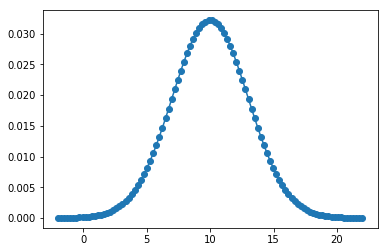

In [255]:
z, w = ex2_2(10, 3, 100, 4)

plt.plot(z,w, 'o-')

2.3

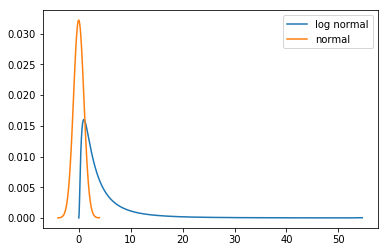

In [265]:
def ex2_3(mu, sd, N, k):
    z, w = ex2_2(mu, sd, N, k)
    z1 = np.exp(z)
    return z1, w


z_l, w_l = ex2_3(0, 1, 200, 4)
z, w = ex2_2(0, 1, 100, 4)
fig = plt.figure()
#plt.plot(z, w, label = "normal")
plt.plot(z_l, w_l, label = "log normal")
plt.plot(z,w, label="normal")
plt.legend(loc = "upper right")

2.4

In [271]:
z, w = ex2_3(10.5, .8, 100, 5)
rv = 0
for i in range(len(z)):
    rv += z[i]*w[i]
    
print(rv)

val = np.exp(10.5 + .32)
print(val)

50024.59670953277
50011.087008521754


3.1

In [272]:
f = lambda x: .1*(x**4) - 1.5*(x**3) + .53*(x**2) + 2*x + 1


3.2

4.1